In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

Pendientes: 6,7

Listos: 1

## Punto 1. 

In [2]:
def SOR(A, b, x0, omega=1, itmax=800, tol=1e-10):
    
    x = x0.copy()
    
    for it in range(1,itmax):
        for i in range(A.shape[0]):
            sum_ = 0.
            for j in range(A.shape[1]):
                if j!=i:
                    sum_ += A[i,j]*x[j]
            x[i] = (1-omega)*x[i] + omega*((b[i] - sum_)/A[i,i])
        
        residuo = np.linalg.norm( np.dot(A,x) - b )
        
        if np.allclose(residuo, tol, atol=tol):
            break
    return x

$$\mathbb{A}^T\mathbb{A}\vec{x} = \mathbb{A}^T\vec{b}$$

In [3]:
A = np.array([[2.,-1],[1.,2],[1.,1.]])
b = np.array([2.,1.,4.])
x_ = np.zeros([2,1])

LHS = A.T@A
RHS = A.T@b

In [4]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

eq1 = 2*x-2
eq2 = -(x-1)/2
eq3 = 4-x

SOR(LHS, RHS, x_)

array([[1.42857143],
       [0.42857143]])

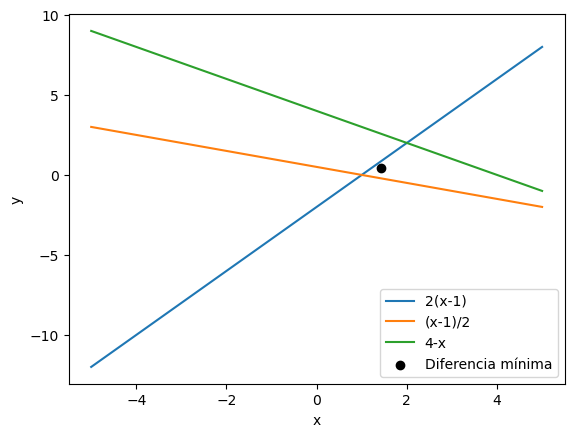

In [5]:
plt.plot(x, eq1, label = '2(x-1)')
plt.plot(x, eq2, label = '(x-1)/2')
plt.plot(x, eq3, label = '4-x')

plt.scatter(SOR(LHS, RHS, x_)[0], SOR(LHS, RHS, x_)[1], label = 'Diferencia mínima', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
X,Y = np.meshgrid(x, y)
z = np.zeros( (len(X),len(Y)) )

Para encontrar los z usemos la definición de distancia dada: $$\vec{d} = \mathbb{A}\vec{x}-\vec{b}.$$

In [7]:
for i in range(len(X)):
    for j in range(len(Y)):
        z[i,j] = np.linalg.norm( ( A@(np.array([x[i], y[j]])) ) - b )

<function matplotlib.pyplot.show(close=None, block=None)>

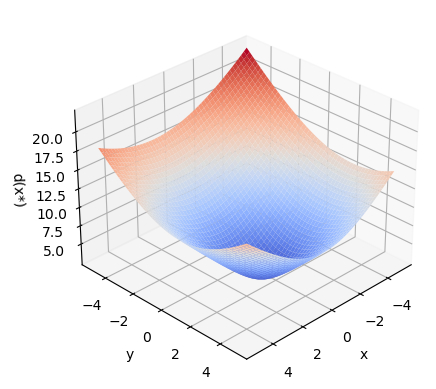

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,z, cmap = 'coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('d(x*)')

ax.view_init(30,45)
plt.show